2024.10.16 星期三 23:42 pm

背景: 我需要了解一下其他人的狀況...

概念: 使用python 的 selenium 庫 完成網路爬蟲任務

用途: 分析班上的數據

In [1]:
execute_chrome_path = r"C:\Users\Sakiyago\Desktop\web_crawer\chrome-win64\chrome.exe" # 替換成你的 chrome 位置
chrome_driver_path = r"C:\Users\Sakiyago\Desktop\web_crawer\chromedriver-win64\chromedriver.exe" # 替換成你的 chromedriver

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time

In [ ]:
# 目標網址
target_link = "http://134.208.3.66/problem/PR113-1-" + input("輸入題號: ")
# target_link = "http://134.208.3.5/problem/Arrays_Problem2"
mode = input("輸入k進入單一查詢模式: ").lower()
if mode == 'k':
    name = input("誰? ")

### Error

In [3]:
# Error
class Error(Exception):
    def __init__(self, message):
        super().__init__(message)

### preparation stage

In [4]:
def create_driver():
    ## service
    service = Service(executable_path = chrome_driver_path)

    ## chrome-option
    chrome_options = Options()
    chrome_options.binary_location = execute_chrome_path

    ## driver GET target_link
    driver = webdriver.Chrome(service=service, options=chrome_options)
    return driver

In [ ]:
driver = create_driver()

## Wait
wait = WebDriverWait(driver, 5)

driver.get(target_link)

### function

In [5]:
def InToPage():
    wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#right-column > div.ivu-card.ivu-card-bordered.ivu-card-dis-hover > div > ul > li"))).click()

In [6]:
def get_rank():
    wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#main > div > div.ivu-card-body > div > div.page > ul > li.ivu-page-next")))
    data = {}  # username : runtime
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    excute_time = driver.find_element(By.CSS_SELECTOR, "#main > div > div.ivu-card-body > div > div.page > ul")
    excute_time = int(excute_time.find_elements(By.CSS_SELECTOR, "li")[-2].text)
    try:
        for _ in range(excute_time):

            time.sleep(0.5)
            # 等待下一页按钮可点击
            next_page_but = wait.until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, '#main > div > div.ivu-card-body > div > div.page > ul > li.ivu-page-next'))
            )
            
            # 等待表格容器可见
            container = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#main > div > div.ivu-card-body > div > div.ivu-table-wrapper > div > div.ivu-table-body > table > tbody")))
            
            # 获取表格行
            trs = container.find_elements(By.CSS_SELECTOR, "tr")
            for tr in trs:
                # 获取运行时间和用户名
                flag = tr.find_elements(By.CSS_SELECTOR, "td")[2].text
                
                # 更新数据
                if "Accepted" in flag:
                    runtime = int(tr.find_elements(By.CSS_SELECTOR, "td")[4].text[:-2])
                    userName = tr.find_elements(By.CSS_SELECTOR, "td")[7].text
                    if userName in data:
                        data[userName] = min(data[userName], runtime)
                    else:
                        data[userName] = runtime
            
            # 点击下一页
            next_page_but.click()
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    except Exception as e:
        raise Error(e)
    return data

In [7]:
def get_by_name(name):
    wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#main > div > div.ivu-card-body > div > div.page > ul > li.ivu-page-next")))
    actully = {"錯誤": 0, "正確": 0}  # 錯誤/正確 : 次數
    total_runtime = [] # runtime
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    excute_time = driver.find_element(By.CSS_SELECTOR, "#main > div > div.ivu-card-body > div > div.page > ul")
    excute_time = int(excute_time.find_elements(By.CSS_SELECTOR, "li")[-2].text)
    try:
        for _ in range(excute_time):
            
            time.sleep(0.5)
            # 等待下一页按钮可点击
            next_page_but = wait.until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, '#main > div > div.ivu-card-body > div > div.page > ul > li.ivu-page-next'))
            )
            
            # 等待表格容器可见
            container = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#main > div > div.ivu-card-body > div > div.ivu-table-wrapper > div > div.ivu-table-body > table > tbody")))
            
            # 获取表格行
            trs = container.find_elements(By.CSS_SELECTOR, "tr")
            for tr in trs:
                # 获取运行时间和用户名
                flag = tr.find_elements(By.CSS_SELECTOR, "td")[2].text
                
                # 更新数据
                userName = tr.find_elements(By.CSS_SELECTOR, "td")[7].text
                if userName == name:
                    if "Accepted" in flag:
                        actully["正確"] += 1
                        runtime = int(tr.find_elements(By.CSS_SELECTOR, "td")[4].text[:-2])
                        total_runtime.append(runtime)
                    else:
                        actully["錯誤"] += 1
            
            # 点击下一页
            next_page_but.click()
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    except Exception as e:
        raise Error(e)
    return [actully, total_runtime]

### tools

In [8]:
def filter_by_k(data, k):
    return {key: value for key, value in data.items() if value <= k}
def the_same_generation(data):
    return {key: value for key, value in data.items() if "411321" in key}

### Main function

In [9]:
def main():
    try:
        if mode != "k":
            InToPage()
            data = dict(sorted(get_rank().items(), key=lambda item: item[1]))
            driver.close()

            print("所有人:")
            print(data)
            print(f"目前有{len(data)}人 Accept")
            print()


            k = int(input("查詢幾ms以下 對象:所有人 "))
            temp = filter_by_k(data, k)
            print(f"目前有 {len(temp)}人 {k}ms 以下")
            print(temp)
            print()
            
            print("對於同一屆:")
            temp = the_same_generation(data)
            print(temp)
            print(f"一共{len(temp)}人 Accept")
            print()
            k = int(input("查詢幾ms以下 對象:同一屆 "))
            temp = filter_by_k(temp, k)
            print(f"同一屆有 {len(temp)}人 {k}ms 以下")
            print(temp)
            print()
        else:
            InToPage()
            actully, total_runtime = get_by_name(name)
            print("報告老大! 結果出爐了!")
            print(f"針對使用者{name}的初步調查如下:")
            print(actully)
            print("AC的提交ms (時間由前到後)")
            print(total_runtime[::-1])

    except Error as E:
        print(f"捕獲到錯誤 : {E}")

In [10]:
if __name__ == "__main__":
    main()
    driver.quit()

所有人:
{'wayne1111': 1, '411321263': 1, '411221219': 1, '411321220': 1, '41107a003': 1, '411321211': 1, 'bao': 1, '411025020': 1, '411321229': 1, '411221250': 1, '411221303': 1, '411321257': 2, '411321256楊景皓': 2, '4112213a1': 2, '411121258': 2, '411321224': 2, '411321251': 2, '411321235': 2, '411321301': 2, 'tkchang': 2, '411121273': 2, '411321240': 2, '411121272': 2, '411321261': 3, '411321214': 3, '411321277': 49, '411321222': 58, '411321280': 58, '411121276': 59, '411321260': 125, '411321216': 156, '411321276': 165, 'bamboostick': 171, 'leosu': 391, '411321228': 483, '411321218': 666}
目前有36人 Accept

目前有 25人 5ms 以下
{'wayne1111': 1, '411321263': 1, '411221219': 1, '411321220': 1, '41107a003': 1, '411321211': 1, 'bao': 1, '411025020': 1, '411321229': 1, '411221250': 1, '411221303': 1, '411321257': 2, '411321256楊景皓': 2, '4112213a1': 2, '411121258': 2, '411321224': 2, '411321251': 2, '411321235': 2, '411321301': 2, 'tkchang': 2, '411121273': 2, '411321240': 2, '411121272': 2, '411321261': 

## 資料分析

In [6]:
# 繪圖用
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties as font

# 表格整理
import pandas as pd

# 數據整理
import numpy as np

# 使用者介面
import ipywidgets as widgets

In [7]:
chinese = font(fname=r".\cjkFonts_allseto_v1.11.ttf")

In [20]:
class Everyone():
    def __init__(self) -> None:
        pass
    
    @staticmethod
    def my_drawer(data):
        plt.figure(figsize=(20, 12))

        # 绘制数据点
        plt.plot(data,
                 marker='o',
                 markersize=10,
                 linewidth=1,
                 linestyle='-',
                 color='blue',
                 markerfacecolor='green',  # 填充
                 markeredgecolor='green'    # 边缘
                )

        # 计算统计信息
        mean = np.mean(data)
        std_dev = np.std(data)
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)

        # 绘制趋势线
        x = np.arange(len(data))
        coeffs = np.polyfit(x, data, 1)  # 线性拟合
        trendline = np.polyval(coeffs, x)
        plt.plot(x, trendline, color='red', linestyle='--', label='Trend Line')

        # 为每个点添加文本标签
        fontSize = 10
        for i, value in enumerate(data):
            plt.text(i, value + std_dev/10, str(value), fontsize=fontSize, ha='center')

        # 添加标签和标题
        plt.ylabel('運行時間 (ms)', fontproperties=chinese, fontsize=15)
        x_display = target_link if 'http' not in target_link else target_link.split('-')[-1]
        plt.title(f"程式設計實驗 問題 \"{x_display}\"", fontproperties=chinese, fontsize=25)
        plt.grid()
        plt.legend()
        plt.show()

        # 统计信息
        stats_text = f'平均值: {mean:.2f}\n標準差: {std_dev:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}'
        print(stats_text)
        print("-----------")
        print(f"總人數: {len(data)}")

    @staticmethod
    def get_information(AC:bool=True):
        wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#main > div > div.ivu-card-body > div > div.page > ul > li.ivu-page-next")))
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        excute_time = driver.find_element(By.CSS_SELECTOR, "#main > div > div.ivu-card-body > div > div.page > ul")
        excute_time = int(excute_time.find_elements(By.CSS_SELECTOR, "li")[-2].text)

        # 資料儲存格式 -> [username, runtime]
        data = []

        if AC:
            try:
                for _ in range(excute_time):

                    time.sleep(0.5)
                    # 等待下一頁按鈕可被點擊
                    next_page_but = wait.until(
                        EC.element_to_be_clickable((By.CSS_SELECTOR, '#main > div > div.ivu-card-body > div > div.page > ul > li.ivu-page-next'))
                    )
                    
                    # 等待表格容器可见
                    container = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#main > div > div.ivu-card-body > div > div.ivu-table-wrapper > div > div.ivu-table-body > table > tbody")))
                    
                    # 获取表格行
                    trs = container.find_elements(By.CSS_SELECTOR, "tr")
                    for tr in trs:

                        Status = tr.find_elements(By.CSS_SELECTOR, "td")[2].text

                        if "Accepte" in Status:
                            runtime = int(tr.find_elements(By.CSS_SELECTOR, "td")[4].text[:-2])
                            userName = tr.find_elements(By.CSS_SELECTOR, "td")[7].text
                            data.append([userName, runtime])
                    
                    # 点击下一页
                    next_page_but.click()
                    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            except Exception as e:
                raise Error(e)
            temp = data[::-1]
            temp = [i[1] for i in temp]
            return temp
        else:
            pass

In [15]:
def get_information_by_username(name):
    pass

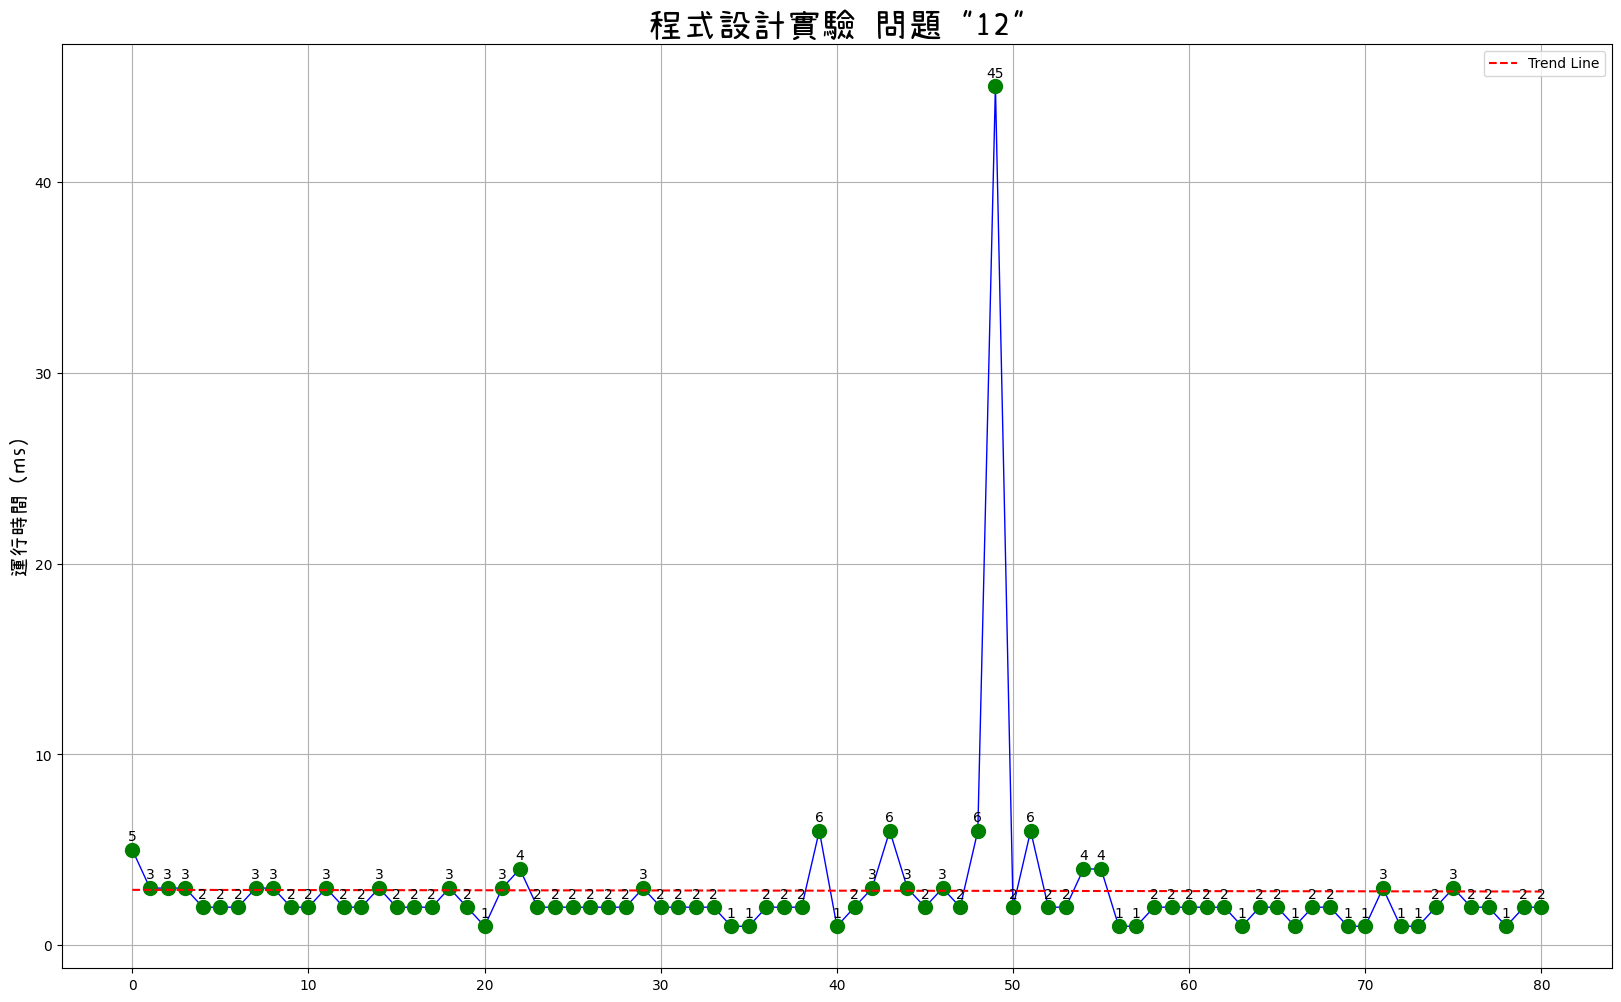

平均值: 2.86
標準差: 4.85
Q1: 2.00
Q3: 3.00
-----------
總人數: 81


In [30]:
target_link = input("輸入網址或題號(題號預設為\"程式設計實驗的Lab\")")
target_link = target_link if "http" in target_link else "http://134.208.3.66/problem/PR113-1-" + target_link

driver = create_driver()

## Wait
wait = WebDriverWait(driver, 5)

driver.get(target_link)
try:
    InToPage()
    everyone = Everyone()
    data = everyone.get_information()
except Exception as e:
    print(e)
driver.close()
everyone.my_drawer(data)